# Data Cleaning & Preprocessing

**`Goal:`** Create interim and fully processed datasets for future analysis and modeling

1. Merge (sentiment) annotated tweets with the rest of their attributes and clean the tweets
2. Clean the full dataset of tweets

Here, cleaning involves: case folding, stopword removal, punctuation removal, numbers removal, etc.

### 1. Library Importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import emoji
import re
from sklearn.model_selection import train_test_split

#Packages for text cleaning
from cleantext import clean
import nltk
#nltk.download('stopwords') 

### 2. Load Datasets

In [5]:
#Load the dataset containing the annotated tweets
#- Note that not all tweets were
annotated_text = pd.read_csv('../data/interim/annotated-sample-2021_10_28.csv')

#Load the data sample from which the text was extracted from for annotation
sample_for_annotation = pd.read_csv('../data/raw/sample.csv')

#Load the full dataset of merged ISP tweets
isp_tweets_df = pd.read_csv('../data/raw/merged.csv')

### 3. Preview the annotated dataframe
Main column of interest is `sentiment`

In [6]:
annotated_text.head(3)

,text,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
0,"50GB gone in one week, @Spectranet_NG na so? I...",1125,Negative,koredeakande@uni.minerva.edu,661,2021-10-28T13:15:28.998694Z,2021-10-28T13:15:28.998724Z,3.864
1,@TheFunkyDee @Spectranet_NG I’m giving \n@Spec...,1122,Negative,koredeakande@uni.minerva.edu,658,2021-10-28T13:15:10.405765Z,2021-10-28T13:15:10.405796Z,14.504
2,@Spectranet_NG @FritztheJanitor Will they help...,1121,Neutral,koredeakande@uni.minerva.edu,657,2021-10-28T13:14:55.664030Z,2021-10-28T13:14:55.664062Z,6.356


### 3. Merge Annotations with tweet attributes

In [7]:
#Drop irrelevant columns in both dataframes and merge on the tweet text
tweet_sentiment_df = pd.merge(sample_for_annotation.drop(columns = ['Coordinates','Place']),
                              annotated_text[['text','sentiment']],
                              left_on='Text',
                              right_on='text').drop(columns='text')

tweet_sentiment_df.head()

,ISP_Name,Time,Text,Source,sentiment
0,sprectranet,2020-02-04 18:30:35+00:00,My family used my spectranet and they don't wa...,Twitter for Android,Neutral
1,sprectranet,2019-06-19 04:59:49,@Spectranet_NG How can I get the freedom mifi ...,Twitter for iPhone,Neutral
2,sprectranet,2020-03-30 07:57:38+00:00,@DrOlufunmilayo @iconic_remi @Spectranet_NG,Twitter for iPhone,Neutral
3,sprectranet,2020-12-31 21:07:52+00:00,@Spectranet_NG Your response just proves how h...,Twitter for Android,Negative
4,sprectranet,2020-09-03 23:09:09+00:00,"Spectranet is just the worse tbh, I can’t even...",Twitter for iPhone,Negative


### 4. Subset the full dataset with only relevant columns
These are the same columns as shown above – except sentiment

In [8]:
#Only get the relevant columns
isp_tweets = isp_tweets_df[['ISP_Name','Time','Text','Source']]

isp_tweets.head()

,ISP_Name,Time,Text,Source
0,sprectranet,2019-05-13 09:30:03,It gives me joy seeing my spectranet turning g...,Twitter for iPhone
1,sprectranet,2020-04-21 06:11:55+00:00,@Spectranet_NG is this even fair? I won’t rene...,Twitter for iPhone
2,sprectranet,2020-02-04 18:30:35+00:00,My family used my spectranet and they don't wa...,Twitter for Android
3,sprectranet,2019-02-16 18:11:48,@Spectranet_NG Can I subscribe via @UBAGroup m...,Twitter for Android
4,sprectranet,2020-08-14 06:25:29+00:00,@EniolaShitta YouTube is where spectranet star...,Twitter for Android


### 5. Quick Preview of the Datasets

In [9]:
tweet_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ISP_Name   377 non-null    object
 1   Time       377 non-null    object
 2   Text       377 non-null    object
 3   Source     377 non-null    object
 4   sentiment  377 non-null    object
dtypes: object(5)
memory usage: 17.7+ KB


In [10]:
isp_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ISP_Name  1646 non-null   object
 1   Time      1646 non-null   object
 2   Text      1646 non-null   object
 3   Source    1646 non-null   object
dtypes: object(4)
memory usage: 51.6+ KB


### 4. Data Cleaning and Reformatting

#### a. Data Type Conversion

From above, we see all the column types look good, except the Time column's. We convert this column to **`datetime`** in both dataframes

In [39]:
#Annotated dataset merged with attributes
tweet_sentiment_df['Time'] = pd.to_datetime(tweet_sentiment_df['Time'])

#Full merged raw dataset
isp_tweets['Time'] = pd.to_datetime(isp_tweets['Time'])

/Users/koredeakande/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### b. Exploring & Handling missing data


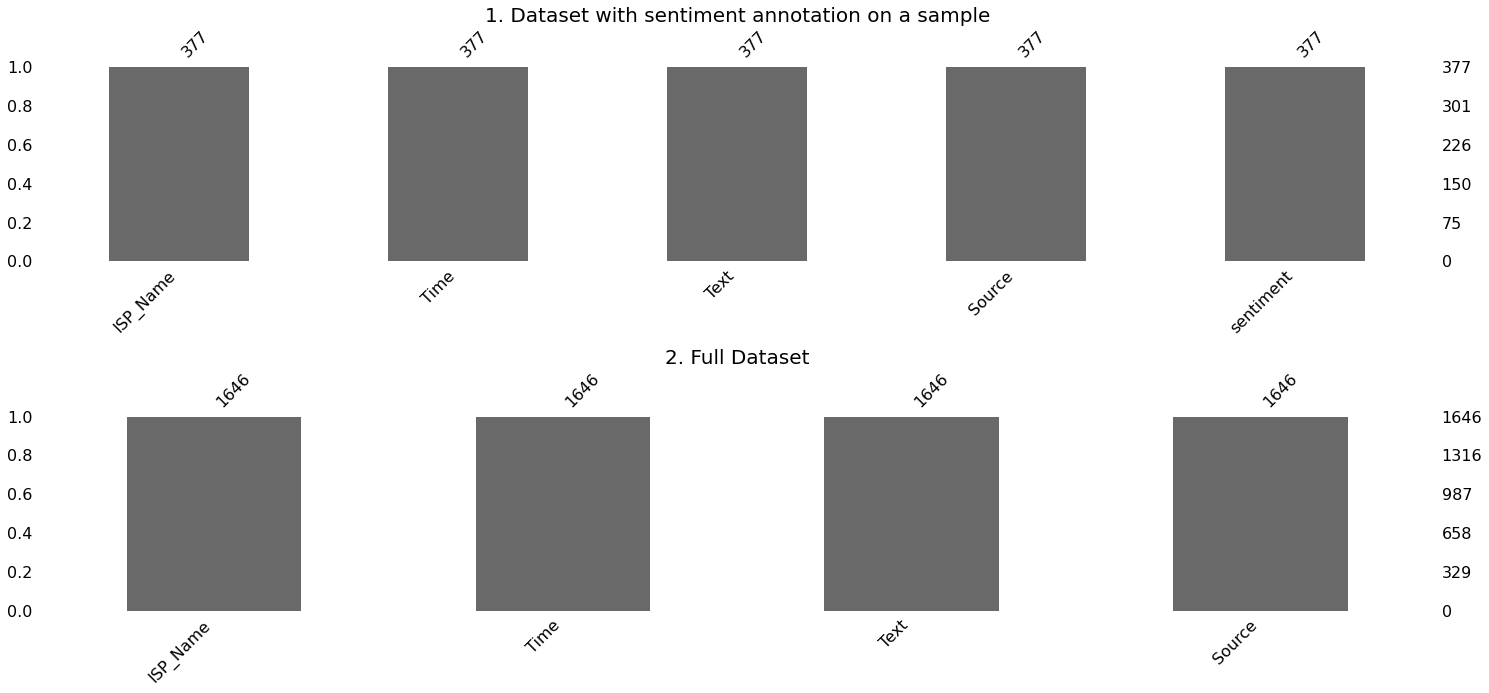

In [40]:
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace = 0.8)

plt.subplot(2,1,1)
plt.title('1. Dataset with sentiment annotation on a sample', fontsize=20)
missingno.bar(tweet_sentiment_df)

plt.subplot(2,1,2)
plt.title('2. Full Dataset', fontsize=20)
missingno.bar(isp_tweets)
plt.show()

One sentiment value is missing in the annotated dataset. Given it is just a single row, I delete it. There are no missing values in the full dataset

In [41]:
#Drop row with missing value
tweet_sentiment_df = tweet_sentiment_df.dropna()
len(tweet_sentiment_df)

377

### c. Cleaning the tweets

In [11]:
def clean_text(text,no_punc=False,no_emoji=False,no_isp_name=False):
    
    """
    Function to clean a single tweet leveraging the clean text package
    
    Input:
        - text (str): Uncleaned tweet
        
    Output:
        - cleaned_text (str): Cleaned tweet
        
    Note: Since BERT was trained on sentences, I do not remove things like punctuations or 
          numbers by deafult as it should be capable of dealing with those 
    """
    
    cleaned_text=clean(text,
                       fix_unicode=True, # fix various unicode errors
                       to_ascii=True,    # transliterate to closest ASCII representation
                       lower=True,       # lowercase text
                       no_line_breaks=True, # fully strip line breaks
                       no_urls=True,      # replace all URLs with ''
                       no_emails=True,   # replace all email addresses with ''
                       no_phone_numbers=True, # replace all phone numbers with ''
                       no_currency_symbols= True, # replace all currency symbols with ''
                       no_numbers=False, # replace all numbers with ''
                       no_digits=False,  # replace all digits with ''
                       no_punct= no_punc, # fully remove punctuation
                       replace_with_url="",
                       replace_with_email="",
                       replace_with_phone_number="",
                       replace_with_number="",
                       replace_with_digit="",
                       replace_with_currency_symbol="",
                       lang="en"
                      )
    
    #Remove @ symbol
    cleaned_text = cleaned_text.replace('@','')
    
    #Remove emojis
    if no_emoji:
        
        #Encode text to find emojis
        text = cleaned_text.encode('utf8')
        #Remove emojis
        cleaned_text = emoji.get_emoji_regexp().sub(r'', text.decode('utf8'))
        
#     if no_isp_name:
        
#         #Remove ISP names –– UPDATE IF YOU ADD MORE ISPS!
#         cleaned_text = re.sub('\b\w*?ranet\w*?\b|\b\w*?tizeti\w*?\b|\b\w*?ipnx\w*?\b','',cleaned_text)
    
    return cleaned_text

In [44]:
#Make copies of the annotated dataset and clean tweets
# -- Copy for partial cleaning: Punctuations not removed
cleaned_annotated = tweet_sentiment_df.copy()
cleaned_annotated.Text = cleaned_annotated.Text.apply(clean_text)

# -- Copy for more cleaning: Punctuations and emojis removed, etc.
cleaned_annotated2 = tweet_sentiment_df.copy()
cleaned_annotated2.Text = cleaned_annotated2.Text.apply(clean_text,no_punc=True,no_emoji=True, no_isp_name=True)

# -- Copy for more cleaning: Punctuations not removed, but emojis removed
cleaned_annotated3 = tweet_sentiment_df.copy()
cleaned_annotated3.Text = cleaned_annotated3.Text.apply(clean_text, no_emoji=True)

#Make a copy of the full merged dataset and clean
cleaned_isp_tweets = isp_tweets.copy()
cleaned_isp_tweets.Text = cleaned_isp_tweets.Text.apply(clean_text)

### d. Preview cleaned text

**Annotated sample of the full dataset [with punctuations]**

In [45]:
for idx,tweet in enumerate(cleaned_annotated.Text[:5]):
    print(str(idx+1)+')',tweet, '\n')

1) my family used my spectranet and they don't want to help my ministry now it has finished. spectranet_ng abeg how will i change my password. 

2) spectranet_ng how can i get the freedom mifi in ajah today 

3) drolufunmilayo iconic_remi spectranet_ng 

4) spectranet_ng your response just proves how horrid your customer service is. rather than ask what my issue is to help resolve, you render an apology. apology accepted!. now can you actually proffer solution? i am really disappointed with your services and attitude to customers 

5) spectranet is just the worse tbh, i can't even watch a 5min video without serious lagging😫😫😫🤦🏽‍♂️ 



**Annotated sample of the full dataset [without punctuations]**

In [46]:
for idx,tweet in enumerate(cleaned_annotated2.Text[:5]):
    print(str(idx+1)+')',tweet, '\n')

1) my family used my spectranet and they dont want to help my ministry now it has finished spectranetng abeg how will i change my password 

2) spectranetng how can i get the freedom mifi in ajah today 

3) drolufunmilayo iconicremi spectranetng 

4) spectranetng your response just proves how horrid your customer service is rather than ask what my issue is to help resolve you render an apology apology accepted now can you actually proffer solution i am really disappointed with your services and attitude to customers 

5) spectranet is just the worse tbh i cant even watch a 5min video without serious lagging 



**Annotated sample of the full dataset [without emojis]**

In [47]:
for idx,tweet in enumerate(cleaned_annotated3.Text[:5]):
    print(str(idx+1)+')',tweet, '\n')

1) my family used my spectranet and they don't want to help my ministry now it has finished. spectranet_ng abeg how will i change my password. 

2) spectranet_ng how can i get the freedom mifi in ajah today 

3) drolufunmilayo iconic_remi spectranet_ng 

4) spectranet_ng your response just proves how horrid your customer service is. rather than ask what my issue is to help resolve, you render an apology. apology accepted!. now can you actually proffer solution? i am really disappointed with your services and attitude to customers 

5) spectranet is just the worse tbh, i can't even watch a 5min video without serious lagging 



**Full dataset**

In [48]:
for idx,tweet in enumerate(cleaned_isp_tweets.Text[:5]):
    print(str(idx+1)+')',tweet, '\n')

1) it gives me joy seeing my spectranet turning green and i get stream as i want with no buffering 💃💃 

2) spectranet_ng is this even fair? i won't renew next month and you people should not even bother calling me. i will curse you! 

3) my family used my spectranet and they don't want to help my ministry now it has finished. spectranet_ng abeg how will i change my password. 

4) spectranet_ng can i subscribe via ubagroup mobile app and get the 100% bonus? 

5) eniolashitta youtube is where spectranet starts to smile cos data will disappear fast fast 😭😭 



### 5. Encoding the sentiment groups

In [49]:
#Dictionary to store the encoding values/labels
label_dict = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

#Encode the values as a new variable: label
cleaned_annotated['label'] = cleaned_annotated.sentiment.map(label_dict)
cleaned_annotated2['label'] = cleaned_annotated2.sentiment.map(label_dict)
cleaned_annotated3['label'] = cleaned_annotated3.sentiment.map(label_dict)

cleaned_annotated.head()

,ISP_Name,Time,Text,Source,sentiment,label
0,sprectranet,2020-02-04 18:30:35+00:00,my family used my spectranet and they don't wa...,Twitter for Android,Neutral,1
1,sprectranet,2019-06-19 04:59:49,spectranet_ng how can i get the freedom mifi i...,Twitter for iPhone,Neutral,1
2,sprectranet,2020-03-30 07:57:38+00:00,drolufunmilayo iconic_remi spectranet_ng,Twitter for iPhone,Neutral,1
3,sprectranet,2020-12-31 21:07:52+00:00,spectranet_ng your response just proves how ho...,Twitter for Android,Negative,0
4,sprectranet,2020-09-03 23:09:09+00:00,"spectranet is just the worse tbh, i can't even...",Twitter for iPhone,Negative,0


### 6. Write Datasets to CSV Files

In [31]:
#Datasets derived from annotated dataset
tweet_sentiment_df.to_csv('../data/interim/sample_with_sentiment_uncleaned.csv',index=False)
cleaned_annotated.to_csv('../data/processed/sample_encoded_and_cleaned.csv',index=False)
cleaned_annotated2.to_csv('../data/processed/sample_encoded_and_cleaned_no_punct.csv',index=False)

#Datasets derived from fully merged dataset
isp_tweets.to_csv('../data/interim/full_merge_uncleaned.csv',index=False)
cleaned_isp_tweets.to_csv('../data/processed/full_merge_cleaned.csv',index=False)

In [52]:
#Get the tweets that have emojis removed, but not punctuations
cleaned_annotated3[['Text']].to_csv('../data/processed/tweets_for_xml_annotation.csv',index=False)

---

### Cleaning for ABSA Annotation

In [30]:
#Load the larger sample for ABSA
full_absa_df = pd.read_csv("../data/raw/sample_for_absa_annotation.csv")

In [31]:
#Load the already annotated ABSA dataset
absa_annotated = pd.read_csv("../data/processed/absa_text_with_punct.csv")

#### • Clean full_absa_df to match absa_annotated

In [32]:
full_absa_df_cleaned['Cleaned text'] = pd.DataFrame(full_absa_df.Text.apply(clean_text))

In [33]:
full_absa_df_cleaned.head()

,Text,Cleaned text
0,spectranet_ng is this even fair? i won't renew...,spectranet_ng is this even fair? i won't renew...
1,eniolashitta youtube is where spectranet start...,eniolashitta youtube is where spectranet start...
2,oluwadamilolaog spectranet_ng my second device...,oluwadamilolaog spectranet_ng my second device...
3,mtnng globacomnigeria gloworld airtelnigeria e...,mtnng globacomnigeria gloworld airtelnigeria e...
4,igalaman tizeti no one. and they will still co...,igalaman tizeti no one. and they will still co...


In [34]:
#Check that there are infact matching tweets in both dataframe – i.e. confirmation we cleaned right
len(pd.merge(full_absa_df_cleaned,absa_annotated,left_on='Cleaned text',right_on='Text'))

188

#### • Now get the tweets that are not in the already annotated dataset

In [35]:
tweets_for_annotation = full_absa_df_cleaned[~full_absa_df_cleaned['Cleaned text'].isin(absa_annotated.Text)]

#### • Ensure there is no overlap between both dataframes!

In [37]:
len(pd.merge(tweets_for_annotation,absa_annotated,left_on='Cleaned text',right_on='Text'))

0

#### • Write tweets_for_annotation to CSV file

In [38]:
tweets_for_annotation.to_csv('../data/processed/new_text_for_absa_annotation2.csv',index=False)